In [48]:
import matplotlib.pyplot as plt
import numpy as np

def scatter(xData,yData,title,x_label,y_label):
    x = [1,2,3,4,5]
    # linear regression with least squares
    m, b = np.polyfit(x, yData, deg=1)
    plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
    plt.scatter(xData,yData)
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    plt.ylim(0, 1)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=10)
    plt.title(title,fontsize=10)
    plt.show()

In [50]:
from gensim.models import Word2Vec
period1580 = Word2Vec.load("/srv/data/tensor/savedModels/period1.model")
period1600 = Word2Vec.load("/srv/data/tensor/savedModels/period2.model")
period1618 = Word2Vec.load("/srv/data/tensor/savedModels/period3.model")
period1625 = Word2Vec.load("/srv/data/tensor/savedModels/period4.model")
period1635 = Word2Vec.load("/srv/data/tensor/savedModels/period5.model")
models = [period1580,period1600,period1618,period1625,period1635]
names = ['1','2','3','4','5']

In [ ]:
for idx,model in enumerate(models): 
    print(idx)
    word = 'opium'
    if word in model.wv: print(model.wv.most_similar(word)) 

In [78]:
xData = ['1580-1599','1600-1617','1618-1624','1625-1634','1636-1641']
ytobaccoData = {}
yopiumData = {}
# tobacco = ['tobacco', 'tobaco', 'tobacca', 'tobacconist','tabacco','tabaco']
# drug = ['opium', 'opiate', 'poppy', 'poppey']
tobacco = ['tobacco']
drug = ['opium']

intoxicate = ['moderate', 'moderation', 'immoderate', 'immoderation', 'temperance', 'temperate',
    'intemperance', 'luxury', 'luxurious']  
custom = ['idleness', 'idle', 'addiction', 'cheap', 'wealth', 'wealthy', 'poor', 'habit', 'custom']
moral = ['good', 'goods', 'evil', 'consumption', 'consume', 'harmful', 'unwholesome', 'wholesome', 'useful']
medical = ['sophisticate', 'medicine', 'medical', 
    'unhealthy', 'healthy', 'malady', 'doctor', 'physician', 'surgeon']
people = ['englishman', 'spanish', 'spaniard', 'turk', 'indian', 'english', 'jewish', 'muhammadan','turkish']
gender = ['woman', 'man', 'wife', 'husband', 'she', 'he', 'her', 'his']
religion = ['catholic', 'popish', 'pope', 'popery', 'atheist', 'idolater', 'pagan', 'idolatry']
colony = ['plantation', 'discovery', 'adventurer', 'adventure', 'merchant', 'trade', 'virginia', 'turkey', 'indies', 'india']
search = intoxicate
for term in tobacco: 
    for otherterm in search:
        yterm = []
        for idx,model in enumerate(models): 
            if term in model.wv and otherterm in model.wv :
                # num+=1 
                # totalScore += model.wv.similarity(term, otherterm)
                score = model.wv.similarity(term, otherterm)
            else: score = 0
            yterm.append(score)
        ytobaccoData[otherterm] = yterm
for term in drug:
    for otherterm in search:
        yterm = []
        for idx,model in enumerate(models): 
            if term in model.wv and otherterm in model.wv :
                # num+=1 
                # totalScore += model.wv.similarity(term, otherterm)
                score = model.wv.similarity(term, otherterm)
            else: score = 0
            yterm.append(score)
        yopiumData[otherterm] = yterm
font = {'fontname':'Times New Roman'}

(0.0, 1.0)

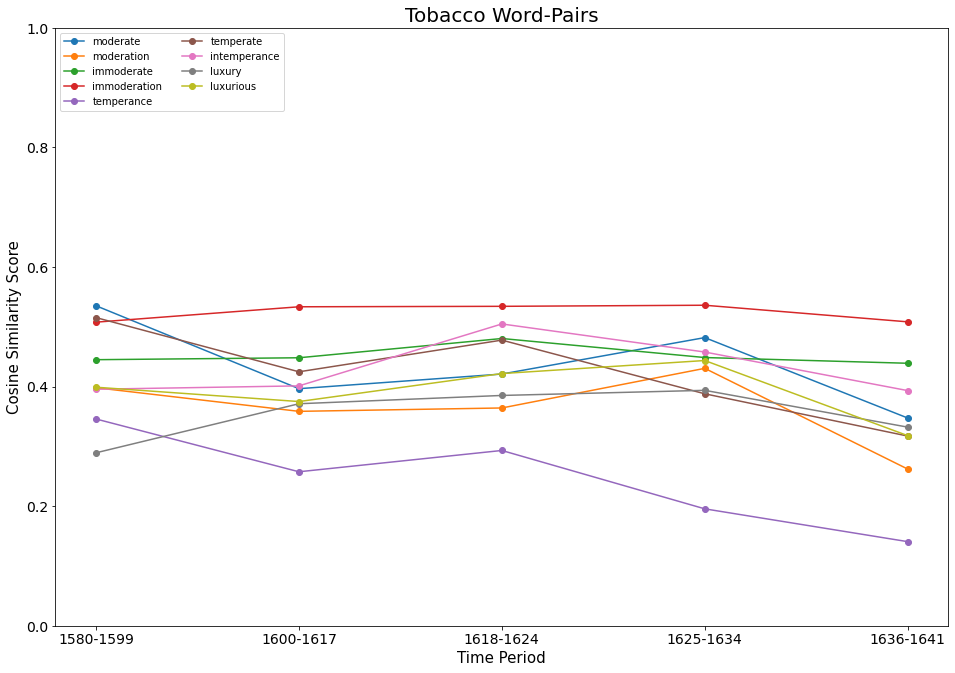

In [79]:
plt.figure(figsize = (16, 11))
for term, y in ytobaccoData.items():
    plt.plot(xData, y, marker = 'o')
    # plt.plot(xData, y, marker = 'o', color='pink')
    # texts.append(plt.text(xData[-1], y[-1], f'  {term}', ))
    # ax.annotate(term, (xData[-1], y[-1]), textcoords = 'offset points', xytext=(0,-15))
plt.legend(loc='upper left', labels = ytobaccoData.keys(), ncol = 2, prop={'size': 10})
plt.title(label = 'Tobacco Word-Pairs', fontsize = 20)
plt.xlabel('Time Period', fontsize=15)
plt.xticks(fontsize = 14)
plt.ylabel('Cosine Similarity Score', fontsize=15)
plt.yticks(fontsize = 14)
plt.ylim([0, 1])


(0.0, 1.0)

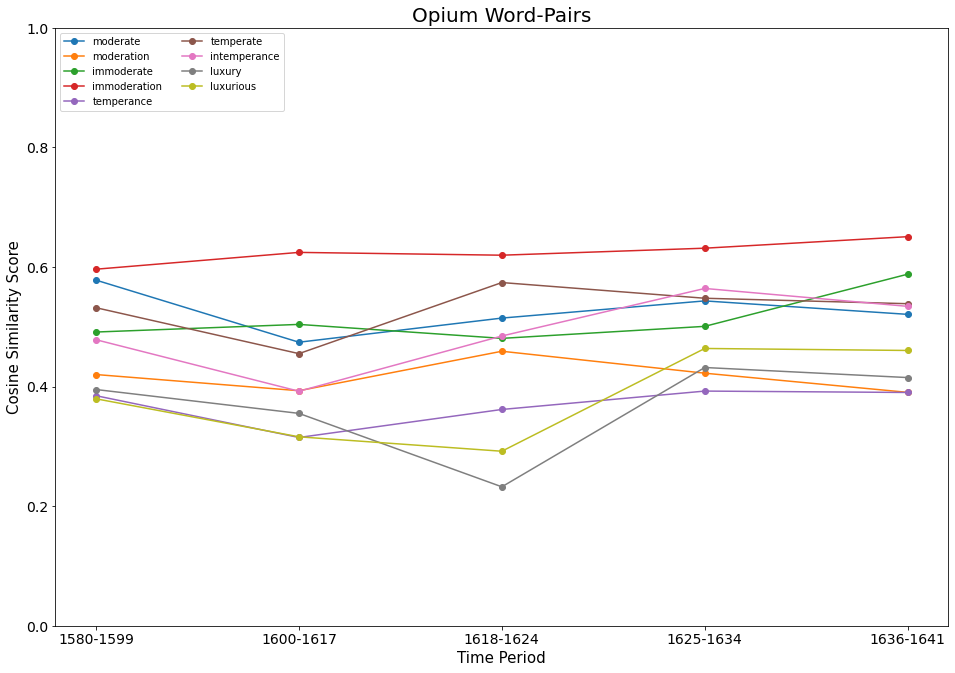

In [80]:
plt.figure(figsize = (16, 11))
for term, y in yopiumData.items():
    plt.plot(xData, y, marker = 'o')
    # plt.plot(xData, y, marker = 'o', color='thistle')
    # texts.append(plt.text(xData[-1], y[-1], f'  {term}', ))
    # ax.annotate(term, (xData[-1], y[-1]), textcoords = 'offset points', xytext=(20,-20))
plt.legend(loc='upper left', labels = ytobaccoData.keys(), ncol = 2, prop={'size': 10})
plt.title(label = 'Opium Word-Pairs', fontsize = 20)
plt.xlabel('Time Period', fontsize=15)
plt.xticks(fontsize = 14)
plt.ylabel('Cosine Similarity Score', fontsize=15)
plt.yticks(fontsize = 14)
plt.ylim([0, 1])


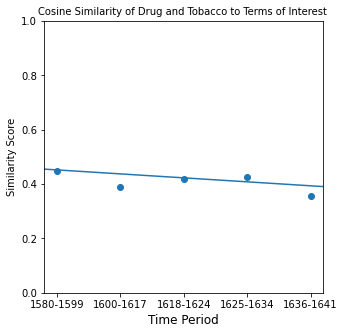

In [6]:
scatter(xData,yData,'Cosine Similarity of Drug and Tobacco to Terms of Interest','Time Period','Similarity Score')

In [ ]:
scatter(xData,yData,'Cosine Similarity of Unwholesome to Consumption Over Time','Time Period','Similarity Score')

In [ ]:
scatter(xData,yData,'Cosine Similarity of Addict to Tobacco Over Time','Time Period','Similarity Score')

In [ ]:
scatter(xData,yData,'Cosine Similarity of Tobacco to Sales Terms Over Time','Time Period','Similarity Score')

In [ ]:
scatter(xData,yData,'Cosine Similarity of Tobacco to Positive Ethical Terms Over Time','Time Period','Similarity Score')

In [ ]:
scatter(xData,yData,'Cosine Similarity of Tobacco to Negative Ethical Terms Over Time','Time Period','Similarity Score')